<a href="https://colab.research.google.com/github/giovanni-lucarelli/basket/blob/main/Analysis_and_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Import preproceesing algorithm
from sklearn.model_selection import train_test_split

# Import classification algorithms
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Import evaluation algorithms
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc

from function import *

## Exploratory Analysis

In [ ]:
url = "https://raw.githubusercontent.com/giovanni-lucarelli/basket/main/data/games_processed.csv"
df = pd.read_csv(url)

In [ ]:
df.tail()

,home_WC_last5,home_D_PTS_last5,home_D_REB_last5,home_D_AST_last5,home_FT_PCT_last5,home_FG_PCT_last5,home_FG3_PCT_last5,away_WC_last5,away_D_PTS_last5,away_D_REB_last5,away_D_AST_last5,away_FT_PCT_last5,away_FG_PCT_last5,away_FG3_PCT_last5,HOME_WINS,GAME_DATE_EST
26433,3,-3.0,-6.2,-3.0,0.8296,0.4788,0.3784,1,-9.2,-5.0,-0.4,0.8296,0.5134,0.3640,0,2022-12-21
26434,4,8.8,5.0,0.6,0.8008,0.5110,0.3546,3,1.2,5.8,-2.8,0.7764,0.4754,0.3504,1,2022-12-21
26435,5,17.0,13.0,-2.2,0.7912,0.4666,0.3754,0,-7.0,-3.8,-4.8,0.8310,0.4458,0.3140,0,2022-12-21
26436,3,-2.0,-4.8,0.0,0.6698,0.4556,0.3542,1,-6.6,-4.6,-0.6,0.7330,0.4724,0.3730,1,2022-12-22
26437,1,-6.4,-1.8,-0.2,0.7430,0.4924,0.3470,3,-0.4,3.8,2.0,0.7176,0.4918,0.3830,1,2022-12-22


In [ ]:
df.describe()

,home_WC_last5,home_D_PTS_last5,home_D_REB_last5,home_D_AST_last5,home_FT_PCT_last5,home_FG_PCT_last5,home_FG3_PCT_last5,away_WC_last5,away_D_PTS_last5,away_D_REB_last5,away_D_AST_last5,away_FT_PCT_last5,away_FG_PCT_last5,away_FG3_PCT_last5,HOME_WINS
count,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000
mean,2.484454,-0.105908,-0.078190,-0.040056,0.759555,0.455084,0.352482,2.515092,0.103888,0.077434,0.039678,0.759732,0.455412,0.353115,0.589039
std,1.273196,7.330229,4.688628,3.767630,0.053468,0.029098,0.051799,1.275398,7.315912,4.721655,3.742854,0.053217,0.029243,0.051689,0.492018
min,0.000000,-31.400000,-20.000000,-15.400000,0.488000,0.348000,0.122400,0.000000,-31.200000,-20.000000,-15.400000,0.526200,0.341000,0.114000,0.000000
25%,2.000000,-5.000000,-3.200000,-2.600000,0.724800,0.435400,0.319800,2.000000,-4.800000,-3.000000,-2.400000,0.725200,0.435600,0.320400,0.000000
50%,2.000000,-0.200000,-0.200000,0.000000,0.761600,0.455000,0.353000,3.000000,0.000000,0.000000,0.000000,0.762000,0.455200,0.354000,1.000000
75%,3.000000,4.800000,3.000000,2.400000,0.796800,0.474600,0.386150,3.000000,5.000000,3.200000,2.600000,0.796600,0.475000,0.386400,1.000000
max,5.000000,31.800000,17.400000,15.400000,0.933800,0.575200,0.571000,5.000000,27.800000,19.600000,15.400000,0.942600,0.586200,0.583000,1.000000


**Is it necessary to scale the features?**

In [ ]:
df.isnull().sum()

home_WC_last5         0
home_D_PTS_last5      0
home_D_REB_last5      0
home_D_AST_last5      0
home_FT_PCT_last5     0
home_FG_PCT_last5     0
home_FG3_PCT_last5    0
away_WC_last5         0
away_D_PTS_last5      0
away_D_REB_last5      0
away_D_AST_last5      0
away_FT_PCT_last5     0
away_FG_PCT_last5     0
away_FG3_PCT_last5    0
HOME_WINS             0
GAME_DATE_EST         0
dtype: int64

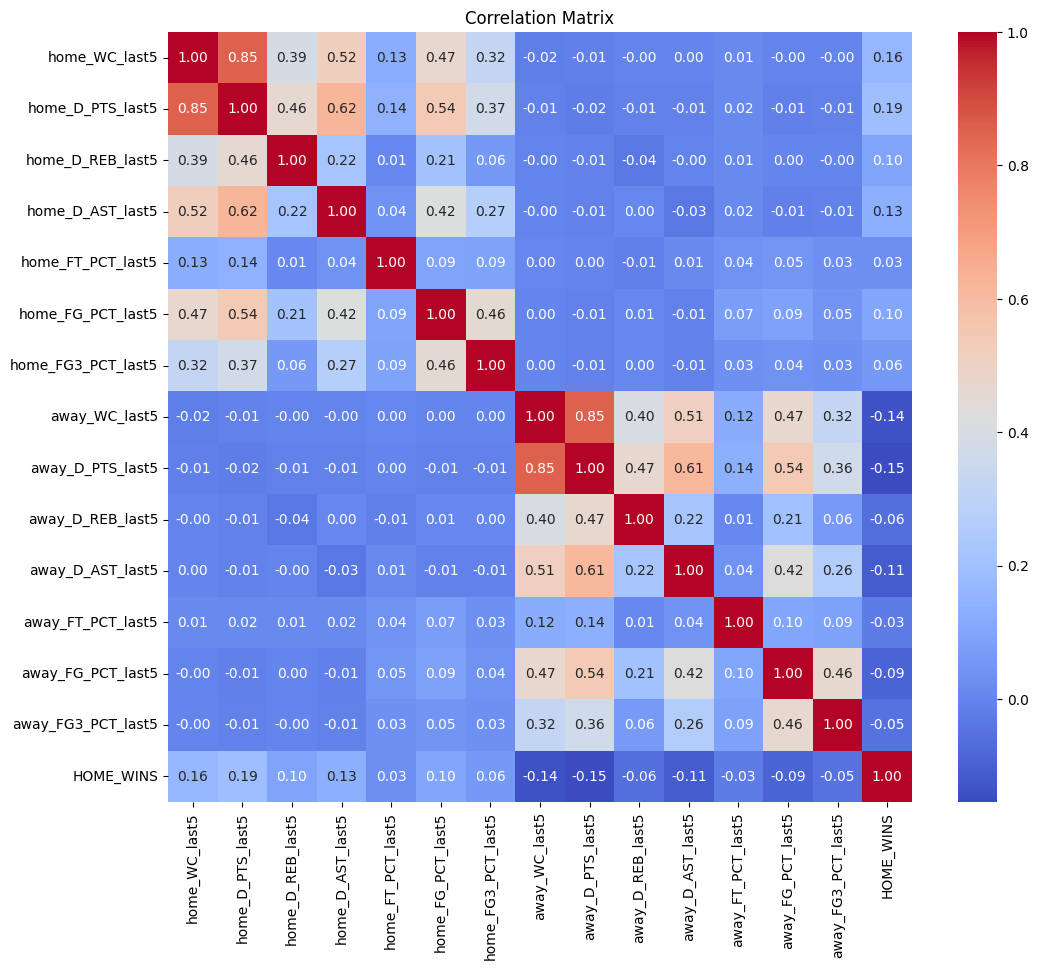

In [ ]:
# Remove the last column
df_corr = df.iloc[:, :-1]

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Remark:** by definition it is a block matrix and the two blocks are (almost) identical as expected.

In [ ]:
# Import preproceesing algorithm
from sklearn.model_selection import train_test_split

# Import classification algorithms
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Import evaluation algorithms
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc


In [ ]:
min(df['HOME_WINS'].value_counts())

10865

In [ ]:
# imbalance ratio

ir = max(df['HOME_WINS'].value_counts())/min(df['HOME_WINS'].value_counts())
ir

1.4333179935572942

Data are pretty balanced, so the following metrics used in the analysis can be considered appropriate

## Static Train-Test split
Train-test split according to the game date: train on games from 2003 to 2021, test on 2022 ($\approx$ 5% - *is it too small? To have $\approx$ 20% we should test on all years from 2019 to 2022*).

**Remark:** consider that in algorithms that uses backpropagation the folowing train-test split is not appropriate (due to causality issues).

In [ ]:
X_test = df[df['GAME_DATE_EST'].str.split('-').str[0].astype(int) >= 2022]
print(len(X_test)/len(df)*100)

5.060897193433694


In [ ]:
X_train = df[df['GAME_DATE_EST'].str.split('-').str[0].astype(int) < 2022]
y_train = X_train['HOME_WINS']
X_train = X_train.drop(columns=['HOME_WINS','GAME_DATE_EST'])

X_test = df[df['GAME_DATE_EST'].str.split('-').str[0].astype(int) >= 2022]
y_test = X_test['HOME_WINS']
X_test = X_test.drop(columns=['HOME_WINS','GAME_DATE_EST'])

evaluation metrics containters

In [ ]:
def compare_binary_classification(names, prec_rec_values, prec_rec_auc, roc_values, roc_auc, acc_values):
    """
        Compare the results of several binary classification algorithms.
        The metrics used are:
        - Receiver Operating Characteristic (ROC)
        - Precision-Recall
        - Accuracy
        
    """
    print(names)

    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    cmap = sns.color_palette('Paired')[1::2]
    fig, axs = plt.subplots(1, 3, figsize=(12, 5))
    for i in range(len(names)):
        axs[0].plot(roc_values[i][0], roc_values[i][1], label='{} AUC {:.3f}'.format(names[i], roc_auc[i]), c=cmap[i])
        axs[1].plot(prec_rec_values[i][1], prec_rec_values[i][0], label='{} AUC-PR {:.3f}'.format(names[i], prec_rec_auc[i]), c=cmap[i])
    axs[0].legend(loc='lower right')
    axs[0].set_xlabel('FPR')
    axs[0].set_ylabel('TPR')
    axs[0].set_title('ROC Curve')

    axs[1].legend(loc='lower left')
    axs[1].set_xlabel('Recall')
    axs[1].set_ylabel('Precision')
    axs[1].set_title('PR Curve')
    bars = axs[2].bar(x=np.arange(len(names)), height=acc_values, color=cmap)
    axs[2].set_xticks(np.arange(len(names)))
    axs[2].set_xticklabels(names)
    axs[2].set_ylim()
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .005, '{:.4f}'.format(yval))
    axs[2].set_ylabel('Accuracy')
    axs[2].set_title('Accuracy Bar Plots')
    plt.tight_layout()
    plt.show()


In [ ]:
model_name_class, prec_rec_class, pr_auc_class, fpr_tpr_class, roc_auc_class, acc_class  = [[] for _ in range(6)]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

## Random Forest

In [ ]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

best_model = None
best_score = 0

# Use  `param_grid.values()` to access the values
# Use `itertools.product` to generate all possible parameter combinations
import itertools
for params in itertools.product(*param_grid.values()):
    # Create a dictionary of parameters for this iteration
    param_dict = dict(zip(param_grid.keys(), params))

    model = RandomForestClassifier(**param_dict)  # Unpack the dictionary
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    if score > best_score:
        best_score = score
        best_model = model

# Extract the best model
best_rf_classifier = best_model

# Predict and evaluate the best model on the test set
y_rf_class = best_rf_classifier.predict(X_test)
rf_class_accuracy = accuracy_score(y_rf_class, y_test)
acc_class.append(rf_class_accuracy)

# Get probabilities for precision-recall and ROC curves
rf_probs = best_rf_classifier.predict_proba(X_test)[:, 1]

# Precision-Recall
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_auc = auc(rf_recall, rf_precision)
prec_rec_class.append([rf_precision, rf_recall])
pr_auc_class.append(rf_auc)

# ROC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_roc_auc = auc(rf_fpr, rf_tpr)
fpr_tpr_class.append([rf_fpr, rf_tpr])
roc_auc_class.append(rf_roc_auc)

# Save the best model parameters and performance metrics
model_name_class.append('RF')

In [ ]:
# default parameters
default_rf_classifier = RandomForestClassifier(n_estimators=500)
default_rf_classifier.fit(X_train, y_train)
y_pred = default_rf_classifier.predict(X_test)
score = accuracy_score(y_test, y_pred)

# Predict and evaluate the best model on the test set
y_rf_class = default_rf_classifier.predict(X_test)
rf_class_accuracy = accuracy_score(y_rf_class, y_test)
acc_class.append(rf_class_accuracy)

# Get probabilities for precision-recall and ROC curves
rf_probs = default_rf_classifier.predict_proba(X_test)[:, 1]

# Precision-Recall
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_auc = auc(rf_recall, rf_precision)
prec_rec_class.append([rf_precision, rf_recall])
pr_auc_class.append(rf_auc)

# ROC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_roc_auc = auc(rf_fpr, rf_tpr)
fpr_tpr_class.append([rf_fpr, rf_tpr])
roc_auc_class.append(rf_roc_auc)

# Save the best model parameters and performance metrics
model_name_class.append('RF_default')

## Support Vector Machines

In [ ]:
# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf']
}

best_model = None
best_score = 0

for params in itertools.product(*param_grid.values()):
    # Create a dictionary of parameters for this iteration
    param_dict = dict(zip(param_grid.keys(), params))

    model = SVC(probability=True,**param_dict)  # Unpack the dictionary
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    if score > best_score:
        best_score = score
        best_model = model

# Extract the best model
best_sv_classifier = best_model

# Predict and evaluate the best model on the test set
y_sv_class = best_sv_classifier.predict(X_test)
sv_class_accuracy = accuracy_score(y_sv_class, y_test)
acc_class.append(sv_class_accuracy)

# Get probabilities for precision-recall and ROC curves
sv_probs = best_sv_classifier.predict_proba(X_test)[:, 1]

# Precision-Recall
sv_precision, sv_recall, _ = precision_recall_curve(y_test, sv_probs)
sv_auc = auc(sv_recall, sv_precision)
prec_rec_class.append([sv_precision, sv_recall])
pr_auc_class.append(sv_auc)

# ROC
sv_fpr, sv_tpr, _ = roc_curve(y_test, sv_probs)
sv_roc_auc = auc(sv_fpr, sv_tpr)
fpr_tpr_class.append([sv_fpr, sv_tpr])
roc_auc_class.append(sv_roc_auc)

# Save the best model parameters and performance metrics
model_name_class.append('SVC')

## Naive Bayes (Bernoulli)

In [ ]:
# Naive Bayes
model_name_class.append('NB')
nb_classifier = BernoulliNB()

# Fit the model
nb_classifier.fit(X_train, y_train)

# Make predictions
y_nb_class = nb_classifier.predict(X_test)

# Evaluate metrics
nb_class_accuracy = accuracy_score(y_nb_class, y_test)
acc_class.append(nb_class_accuracy)
nb_probs = nb_classifier.predict_proba(X_test)[:, 1]
nb_precision, nb_recall, _ = precision_recall_curve(y_test, nb_probs)
nb_auc = auc(nb_recall, nb_precision)
prec_rec_class.append([nb_precision, nb_recall])
pr_auc_class.append(nb_auc)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_roc_auc = auc(nb_fpr, nb_tpr)
fpr_tpr_class.append([nb_fpr, nb_tpr])
roc_auc_class.append(nb_roc_auc)

## Dummy Classifier

In [ ]:
# dummy classifier
model_name_class.append('DUMMY')
dummy_classifier = DummyClassifier()
dummy_classifier.fit(X_train, y_train)
y_dummy_class = dummy_classifier.predict(X_test)
dummy_class_accuracy = accuracy_score(y_dummy_class, y_test)
acc_class.append(dummy_class_accuracy)
dummy_probs = dummy_classifier.predict_proba(X_test)[:, 1]
dummy_precision, dummy_recall, _ = precision_recall_curve(y_test, dummy_probs)
dummy_auc = auc(dummy_recall, dummy_precision)
prec_rec_class.append([dummy_precision, dummy_recall])
pr_auc_class.append(dummy_auc)
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_probs)
dummy_roc_auc = auc(dummy_fpr, dummy_tpr)
fpr_tpr_class.append([dummy_fpr, dummy_tpr])
roc_auc_class.append(dummy_roc_auc)

In [ ]:
model_name_class

['RF', 'RF_default', 'SVC', 'NB', 'DUMMY']

## K-Nearest Neighbour

In [ ]:
# Define model name and parameter grid
model_name_class.append('KNN')
param_grid = {
    'n_neighbors': [3, 30],   # Range of neighbors to test
    'weights': ['uniform', 'distance'], # Use uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan'] # Different distance metrics
}

best_model = None
best_score = 0

for params in itertools.product(*param_grid.values()):
    # Create a dictionary of parameters for this iteration
    param_dict = dict(zip(param_grid.keys(), params))

    model = KNeighborsClassifier(**param_dict)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    if score > best_score:
        best_score = score
        best_model = model

# Extract the best model
best_knn_classifier = best_model

# Make predictions on the test set
y_knn_class = best_knn_classifier.predict(X_test)

# Evaluate metrics
knn_class_accuracy = accuracy_score(y_knn_class, y_test)
acc_class.append(knn_class_accuracy)
knn_probs = best_knn_classifier.predict_proba(X_test)[:, 1]

# Precision-Recall curve and AUC
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
knn_auc = auc(knn_recall, knn_precision)
prec_rec_class.append([knn_precision, knn_recall])
pr_auc_class.append(knn_auc)

# ROC curve and AUC
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_roc_auc = auc(knn_fpr, knn_tpr)
fpr_tpr_class.append([knn_fpr, knn_tpr])
roc_auc_class.append(knn_roc_auc)

## Comparison of the techniques

['RF', 'RF_default', 'SVC', 'NB', 'DUMMY', 'KNN']


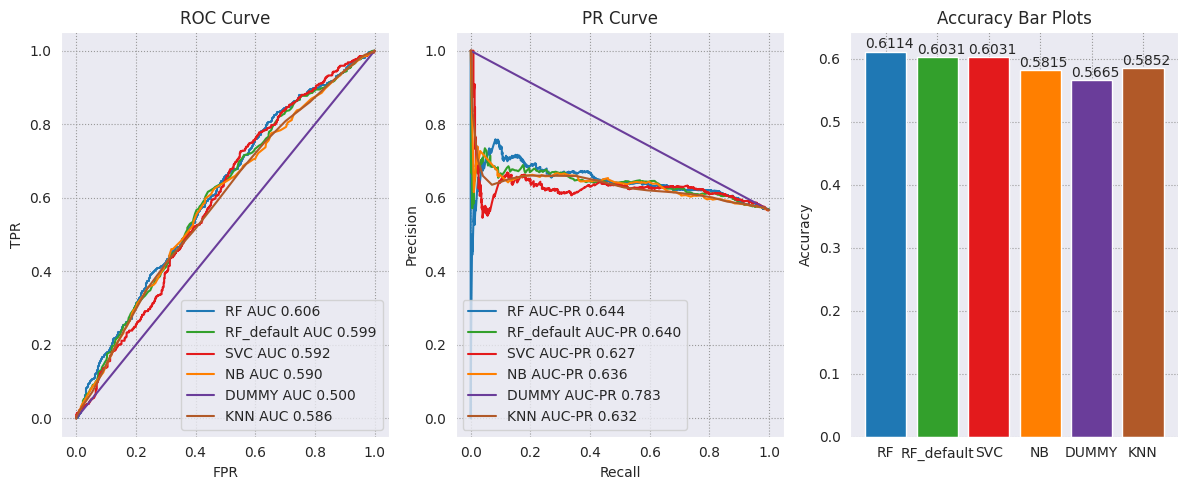

In [ ]:
compare_binary_classification(model_name_class, prec_rec_class, pr_auc_class, fpr_tpr_class, roc_auc_class, acc_class)